In [1]:
## Building a Reccommendation System Using Similarity Matrix

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Similarity Matrix Approach


In [2]:
movies = pd.read_csv("/Users/laurenwilliams/Desktop/dataset/movies.csv")
ratings = pd.read_csv("/Users/laurenwilliams/Desktop/dataset/ratings.csv")
ratings = pd.merge(movies,ratings).drop(['timestamp'], axis=1)
ratings.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [ ]:
movies = pd.read_csv("/Users/laurenwilliams/Desktop/dataset/movies.csv")
ratings = pd.read_csv("/Users/laurenwilliams/Desktop/dataset/ratings.csv")
ratings = pd.merge(movies,ratings).drop(['genres','timestamp'], axis=1)
ratings.head()

In [3]:
user_ratings = ratings.pivot_table(index=['userId'], columns=['title'],values = 'rating')
user_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## drop movies that have less than ten users that have rated them
user_ratings = user_ratings.dropna(thresh=10,axis=1).fillna(0)
user_ratings.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Build similarity matrix

item_similarity_df = user_ratings.corr(method='pearson')
item_similarity_df.head(50)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
101 Dalmatians (1996),0.087931,0.148903,0.006139,0.223481,0.234459,1.000000,0.285112,0.119843,0.072399,0.029967,...,0.114968,0.077232,0.096294,0.067134,0.113224,0.184324,0.054024,0.047804,0.156932,0.078734
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.224052,0.142141,-0.016835,0.211473,0.119132,0.285112,1.000000,0.134037,0.017264,-0.046277,...,0.120302,0.125816,0.049818,0.083650,0.171654,0.274260,0.077594,0.085606,0.248820,0.171118
12 Angry Men (1957),0.034223,0.159756,0.031704,0.011784,0.059187,0.119843,0.134037,1.000000,0.132979,0.058862,...,0.104518,0.028415,0.079905,0.241435,0.144652,0.122107,0.056742,-0.001708,0.074306,0.102744
12 Years a Slave (2013),0.009277,0.135486,-0.024275,0.091964,-0.025882,0.072399,0.017264,0.132979,1.000000,0.249931,...,0.024045,0.038127,0.013786,0.190366,0.104150,0.017351,0.063325,0.002528,0.037469,0.004213


In [7]:
def get_similar_movies(movie_name, user_rating):
    similar_score = item_similarity_df[movie_name]*(user_rating-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    return similar_score

In [14]:
action_lover = [("2001: A Space Odyssey (1968)", 5), ("(500) Days of Summer (2009)",1), ("17 Again (2009)",1)]

similar_movies = pd.DataFrame()

for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar_movies(movie,rating))
    
similar_movies.head()
similar_movies.sum().sort_values(ascending=False)


2001: A Space Odyssey (1968)    2.242223
Blade Runner (1982)             1.386908
Apocalypse Now (1979)           1.093400
Aliens (1986)                   1.061859
African Queen, The (1951)       1.049943
                                  ...   
Definitely, Maybe (2008)       -1.226452
Friends with Benefits (2011)   -1.235528
Marley & Me (2008)             -1.265824
(500) Days of Summer (2009)    -1.730383
17 Again (2009)                -1.868835
Length: 2269, dtype: float64

In [9]:

ratings.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


## KNN Classification

In [15]:
rating_counts = pd.DataFrame(ratings['rating'].value_counts()).reset_index()
rating_counts.columns = ['movieId', "rating"]
rating_counts






,movieId,rating
0,4.0,26818
1,3.0,20047
2,5.0,13211
3,3.5,13136
4,4.5,8551
5,2.0,7551
6,2.5,5550
7,1.0,2811
8,1.5,1791
9,0.5,1370


In [16]:
combine_movie_rating = ratings.dropna(axis = 0, subset = ['title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [17]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,movieId,title,genres,userId,rating,totalRatingCount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,215


In [18]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


In [19]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,movieId,title,genres,userId,rating,totalRatingCount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.000,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.000,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.500,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.500,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.500,215


In [20]:
rating_popular_movie.shape


(41362, 6)

/var/folders/96/kcxl3ncj1d1fny8mmgsg806m0000gn/T/ipykernel_7565/3647314219.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=rating_popular_movie, x="movieId", y="rating", alpha=0.7, palette='coolwarm')


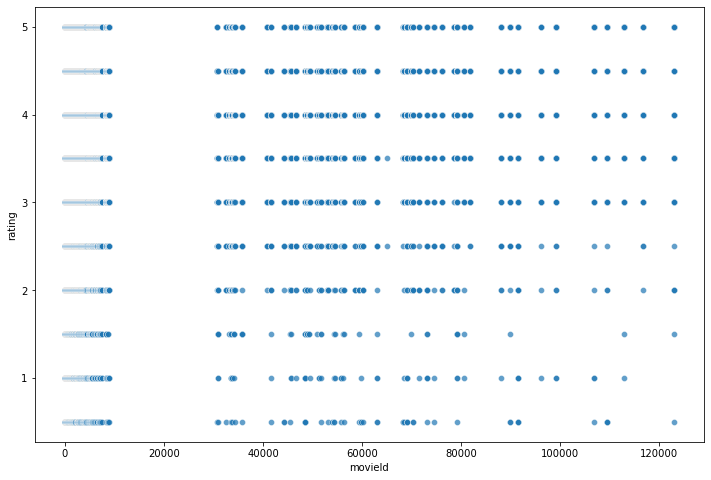

In [21]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(data=rating_popular_movie, x="movieId", y="rating", alpha=0.7, palette='coolwarm')

df = pd.get_dummies(rating_popular_movie,drop_first=True)

In [22]:
# plt.figure(figsize=(12,8))
# sns.scatterplot(data=rating_popular_movie, x="movieId", y="rating", hue="Class", alpha=0.7, palette='coolwarm')

# df = pd.get_dummies(rating_popular_movie,drop_first=True)

In [23]:
## First lets create a Pivot matrix

movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


In [24]:
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [25]:
movie_features_df.shape


(450, 606)

In [26]:
import numpy as np

query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
query_index =2

119


In [27]:
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)


In [28]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 2001: A Space Odyssey (1968):

1: Blade Runner (1982), with distance of 0.3292643457846739:
2: Alien (1979), with distance of 0.43005304285249724:
3: Apocalypse Now (1979), with distance of 0.4308894589715001:
4: Aliens (1986), with distance of 0.43633477549970023:
5: Clockwork Orange, A (1971), with distance of 0.4384022946706072:


In [ ]:
ratings

## Linear Classification

In [20]:
from scipy.sparse import csr_matrix

# There will be lot of nan value in our new dataframe as it is highly unlikely that that ours users have seen almost all movies.
movie_features=df.pivot(index='movieId', columns='userId',values='rating').fillna(0)
matrix_movies_features=csr_matrix(movie_features.values)
print(matrix_movies_features)

  (0, 0)	4.0
  (0, 4)	4.0
  (0, 6)	4.5
  (0, 14)	2.5
  (0, 16)	4.5
  (0, 17)	3.5
  (0, 18)	4.0
  (0, 20)	3.5
  (0, 26)	3.0
  (0, 30)	5.0
  (0, 31)	3.0
  (0, 32)	3.0
  (0, 39)	5.0
  (0, 42)	5.0
  (0, 43)	3.0
  (0, 44)	4.0
  (0, 45)	5.0
  (0, 49)	3.0
  (0, 52)	3.0
  (0, 55)	5.0
  (0, 61)	5.0
  (0, 62)	4.0
  (0, 64)	4.0
  (0, 66)	2.5
  (0, 69)	5.0
  :	:
  (450, 302)	5.0
  (450, 303)	3.0
  (450, 316)	3.5
  (450, 328)	5.0
  (450, 336)	2.0
  (450, 349)	2.5
  (450, 362)	3.5
  (450, 377)	5.0
  (450, 405)	3.5
  (450, 411)	4.0
  (450, 414)	4.0
  (450, 444)	4.0
  (450, 471)	5.0
  (450, 491)	5.0
  (450, 519)	5.0
  (450, 521)	3.5
  (450, 530)	5.0
  (450, 544)	3.0
  (450, 546)	5.0
  (450, 556)	3.0
  (450, 557)	2.0
  (450, 581)	4.0
  (450, 591)	4.0
  (450, 594)	3.5
  (450, 605)	3.0


In [24]:
from sklearn.neighbors import NearestNeighbors


knn=NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)



In [26]:
knn.fit(matrix_movies_features)


NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [30]:
pip install fuzzywuzzy

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [45]:
from fuzzywuzzy import process
# ['title'][idx]

def recommender(movie_name, data,model, n_recommendations ):
    model.fit(data)
    idx=process.extractOne(movie_name, movie_features_df.index[query_index])[2]
    print('Movie Selected:-',movie_features_df.index[query_index], 'Index: ',idx)
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(movie_features_df.index[query_index][i].where(i!=idx))
    
recommender('jumanji', movie_features_df, knn, 1)

IndexError: tuple index out of range

In [ ]:
# import support vector classifier 
# "Support Vector Classifier"
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
 
# fitting x samples and y classes 
clf.fit(x, y) 


# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
 
# Load the datasets
cancer = rating_with_totalRatingCount
X = rating_with_totalRatingCount.data[:, :2]
y = rating_with_totalRatingCount.target
 
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)
 
# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )
 
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()


# from sklearn.model_selection import train_test_split
# #split data for training set and testing set

# def data_splitting(data, target):
    
#     # TODO 4.1
#     X_train, X_test, t_train, t_test = train_test_split(data, target, test_size = 0.2,
#                                                         train_size = 0.8, random_state=0)

    
#     return X_train, X_test, t_train, t_test

# # Notice we pass iris.data to data and iris.target to target!
# X_train, X_test, t_train, t_test = data_splitting(
#     data=ratings['title']
#     target=ratings['rating']
    
# )

# print("Train data shape: {}".format(X_train.shape))
# print("Train target shape: {}".format(t_train.shape))
# print("Test data shape: {}".format(X_test.shape))
# print("Test target shape: {}".format(t_test.shape))

In [ ]:
# from sklearn.linear_model import RidgeClassifier
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier



# TODO 10.1
X_train, X_test, t_train, t_test = data_splitting(data = ratings, target = ratings.target)

# TODO 10.2
# ridge = RidgeClassifier()
# perceptron = Perceptron()
# sgd = SGDClassifier()
# svm = SVC()
# logreg = LogisticRegression()
knn = KNeighborsClassifier()
# nb = GaussianNB()


clfs = [ ridge, perceptron, sgd, svm, logreg, knn, nb]
names = ["Ridge", "Perceptron", "SGD", "SVM", "LogReg", "kNN", "NaiveBayes"]

train_accs = []
test_accs = []

for name, clf in zip(names, clfs):
    print("{:=^50s}".format(name))
    
    # TODO 10.3
    clf.fit(X_train, t_train)
    
    # TODO 10.4--evaluate model by compute score using train data
    train_score = clf.score(X_train, t_train)

    # TODO 10.5--test_score = clf.score(X_test, t_test)
    test_score = clf.score(X_test, t_test)

    print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}")
    
    # TODO 10.6--use clf to make a prediction for train data
    y_train = clf.predict(X_train)

    # TODO 10.7--use clf to make predicttion for test data
    y_test = clf.predict(X_test)
    
    
    # Track each model/classifier's train and test accuracy
    train_accuracies = train_accs.append(train_score)
    test_accuracies = test_accs.append(test_score)
    print(train_accuracies)
    print(test_accuracies)
    
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    plt.plot(t_train, 'ro')
    plt.plot(y_train, 'bx')
    plt.title("Train")
    
    plt.subplot(122)
    plt.plot(t_test, 'ro')
    plt.plot(y_test, 'bx')
    plt.title("Test")
    plt.suptitle(name)
    plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array(ratings)
y = np.array(ratings)
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## Using TMDB Dataset

In [ ]:
movies1 = pd.read_csv("/Users/laurenwilliams/Desktop/TMDBDataset/tmdb_5000_movies.csv")
credits = pd.read_csv("/Users/laurenwilliams/Desktop/TMDBDataset/tmdb_5000_credits.csv")

movies1.head()

In [ ]:
import json

pd.io.json.json_normalize(movies1.acList[1])
# changing the genres column from json to string
# movies1_newlist = movies1['genres'].apply(json.loads)
# d.DataFrame(movies1_newlist.tolist()) # or stdf.apply(pd.Series)

# for index,i in zip(movies1.index,movies1['genres']):
#     new_list = []
#     for j in range(len(i)):
#         new_list.append((i[j]['name'])) # the key 'name' contains the name of the genre
#     movies1.loc[index,'genres'] = str(new_list)


In [ ]:
movies1.head()